# Predict Password Strength

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Collection

In [ ]:
#Importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Ignore warnings
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

#Importing SHAP(XAI)
import shap
shap.initjs()

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Datasets Collection/IE105/password_data.sqlite')
data = pd.read_sql_query("SELECT * FROM Users" ,conn)

In [ ]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [ ]:
data.shape

(100000, 3)

# 2. Data Cleaning

In [ ]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [ ]:
# Removing irrelevant columns
data = data.drop('index', axis = 1)

In [ ]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [ ]:
# Check duplicated data or duplicate rows
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Check missing data
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [ ]:
data.isnull().any()

,0
password,False
strength,False


In [ ]:
data.isnull().any().sum()

0

In [ ]:
# Check data types of every feature
data.dtypes

,0
password,object
strength,int64


In [ ]:
# Check if strength has any others irrelerant values
data['strength']

,strength
0,1
1,1
2,1
3,2
4,1
...,...
99995,1
99996,1
99997,1
99998,1


In [ ]:
data['strength'].unique()

array([1, 2, 0])

# 3. Semantic Analysis

In [ ]:
data.columns

Index(['password', 'strength'], dtype='object')

In [ ]:
data['password']

,password
0,zxe870819
1,xw46454nr23l
2,soporte13
3,accounts6000webhost.com
4,c443balg
...,...
99995,obejofi215
99996,fmiopvxb64
99997,czvrbun38
99998,mymyxe430


In [ ]:
data['password'][0]

'zxe870819'

In [ ]:
type(data['password'][0])
#This is a string types so we can operate with the strings function

str

In [ ]:
# Ask some questions to do semantic analysis
# 1-) How many password textual actually holds only numeric characters ?

In [ ]:
data["password"].str

In [ ]:
data["password"].str.isnumeric()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data["password"].str.isnumeric().sum()

26

In [ ]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [ ]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [ ]:
# 2-) How many password textual actually holds only Upper-case character ?
data["password"].str.isupper()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data["password"].str.isupper().sum()

1506

In [ ]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [ ]:
data[data["password"].str.isupper()].shape

(1506, 2)

In [ ]:
# 3-) How many password textual actually holds only alphabet

In [ ]:
data["password"].str.isalpha()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data["password"].str.isalpha().sum()

50

In [ ]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [ ]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [ ]:
# 4-)  How many password textual actually holds alpha-numeric character ?

In [ ]:
data["password"].str.isalnum()

,password
0,True
1,True
2,True
3,False
4,True
...,...
99995,True
99996,True
99997,True
99998,True


In [ ]:
data["password"].str.isalnum().sum()

97203

In [ ]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [ ]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [ ]:
# 5-) How many password textual actually holds title-case character ?

In [ ]:
data["password"].str.istitle()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data["password"].str.istitle().sum()

932

In [ ]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [ ]:
data[data["password"].str.istitle()].shape

(932, 2)

In [ ]:
# 6-) How many password textual actually holds special character ?

In [ ]:
data["password"]

,password
0,zxe870819
1,xw46454nr23l
2,soporte13
3,accounts6000webhost.com
4,c443balg
...,...
99995,obejofi215
99996,fmiopvxb64
99997,czvrbun38
99998,mymyxe430


In [ ]:
# A package with special characters defined
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# A function that returns 1 if it contains a special character

def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [ ]:
data["password"].apply(find_semantics)

,password
0,NaN
1,NaN
2,NaN
3,1.0
4,NaN
...,...
99995,NaN
99996,NaN
99997,NaN
99998,NaN


In [ ]:
data["password"].apply(find_semantics)==1

,password
0,False
1,False
2,False
3,True
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [ ]:
(data["password"].apply(find_semantics)==1).sum()

2663

In [ ]:
data[data["password"].apply(find_semantics)==1].shape

(2663, 2)

# 4. Feature Engineering

In [ ]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [ ]:
# length of every Password

In [ ]:
data["password"]

,password
0,zxe870819
1,xw46454nr23l
2,soporte13
3,accounts6000webhost.com
4,c443balg
...,...
99995,obejofi215
99996,fmiopvxb64
99997,czvrbun38
99998,mymyxe430


In [ ]:
data["password"][0]

'zxe870819'

In [ ]:
len(data["password"][0])

9

In [ ]:
data["password"].str.len()

,password
0,9
1,12
2,9
3,23
4,8
...,...
99995,10
99996,10
99997,9
99998,9


In [ ]:
data["length"] = data["password"].str.len()
data["length"]

,length
0,9
1,12
2,9
3,23
4,8
...,...
99995,10
99996,10
99997,9
99998,9


In [ ]:
# Frequency of Lowercase Characters :

In [ ]:
password = "Lukaku0079"

In [ ]:
[char for char in password if char.islower()]

['u', 'k', 'a', 'k', 'u']

In [ ]:
len([char for char in password if char.islower()])

5

In [ ]:
len([char for char in password if char.islower()]) / len(password)

0.5

In [ ]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [ ]:
# Frequency of Uppercase Characters

In [ ]:
[char for char in password if char.isupper()]

['L']

In [ ]:
len([char for char in password if char.isupper()])

1

In [ ]:
len([char for char in password if char.islower()]) / len(password)

0.5

In [ ]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [ ]:
# Frequency of Numeric Characters

In [ ]:
[char for char in password if char.isdigit()]

['0', '0', '7', '9']

In [ ]:
len([char for char in password if char.isdigit()])

4

In [ ]:
len([char for char in password if char.isdigit()]) / len(password)

0.4

In [ ]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [ ]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [ ]:
# Frequency of Special-case Characters

In [ ]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [ ]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [ ]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [ ]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [ ]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# 5. Data Analysis

In [ ]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [ ]:
# "length" - "Strength" Analysis
data[["length" , "strength"]]

,length,strength
0,9,1
1,12,1
2,9,1
3,23,2
4,8,1
...,...,...
99995,10,1
99996,10,1
99997,9,1
99998,9,1


In [ ]:
data[["length" , "strength"]].groupby("strength").agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [ ]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

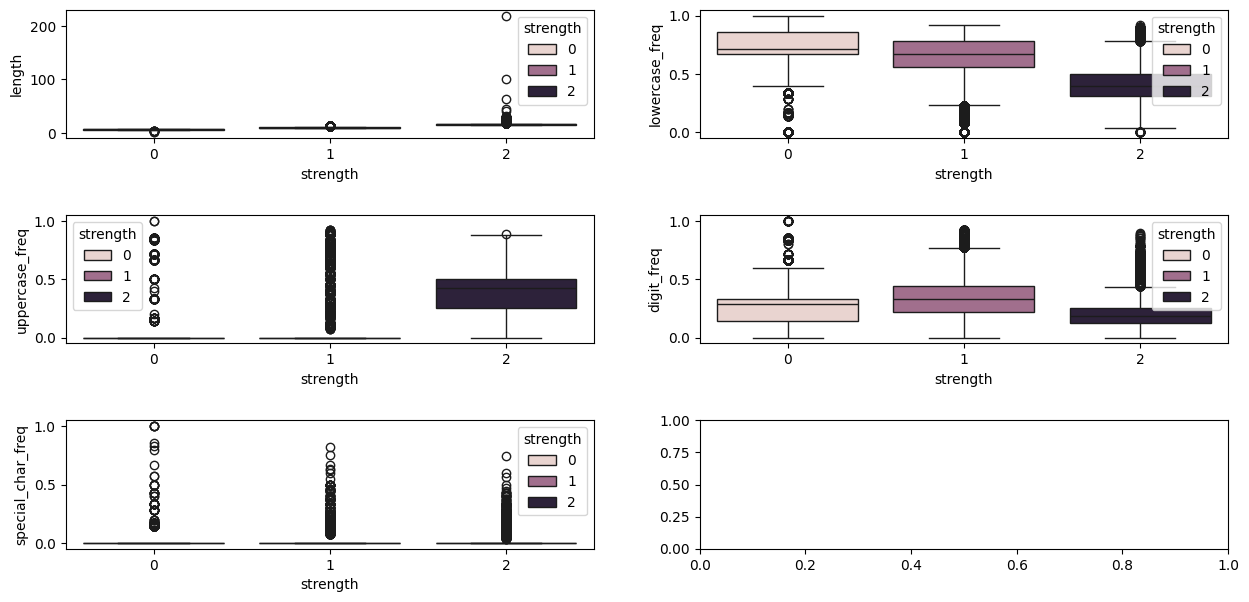

In [ ]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))
sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

# 6. Feature Importance

In [ ]:
data[data['strength']==0]

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
20,dtc5aoy,0,7,0.857,0.0,0.143,0.0
47,paxton0,0,7,0.857,0.0,0.143,0.0
49,joskes9,0,7,0.857,0.0,0.143,0.0
81,saber50,0,7,0.714,0.0,0.286,0.0
91,ficko69,0,7,0.714,0.0,0.286,0.0
...,...,...,...,...,...,...,...
99977,1990pe,0,6,0.333,0.0,0.667,0.0
99979,chbgj12,0,7,0.714,0.0,0.286,0.0
99981,wnpci8,0,6,0.833,0.0,0.167,0.0
99984,sayda82,0,7,0.714,0.0,0.286,0.0


In [ ]:
data[data['strength']==0]["length"]

,length
20,7
47,7
49,7
81,7
91,7
...,...
99977,6
99979,7
99981,6
99984,7


In [ ]:
def get_dist(data , feature):

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength' , y=feature , data=data )

    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)

    plt.legend()
    plt.show()

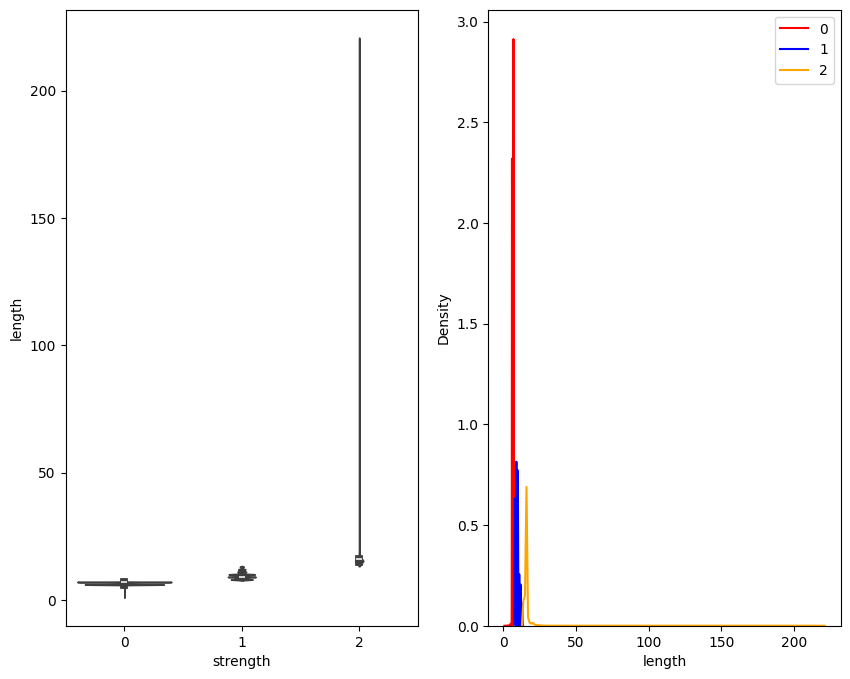

In [ ]:
get_dist(data , "length")

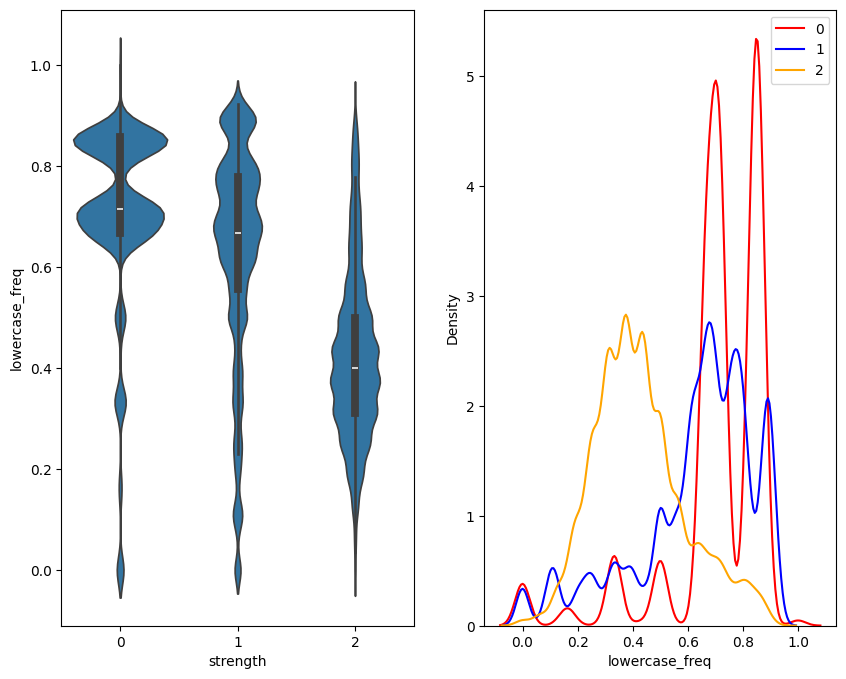

In [ ]:
get_dist(data , 'lowercase_freq')

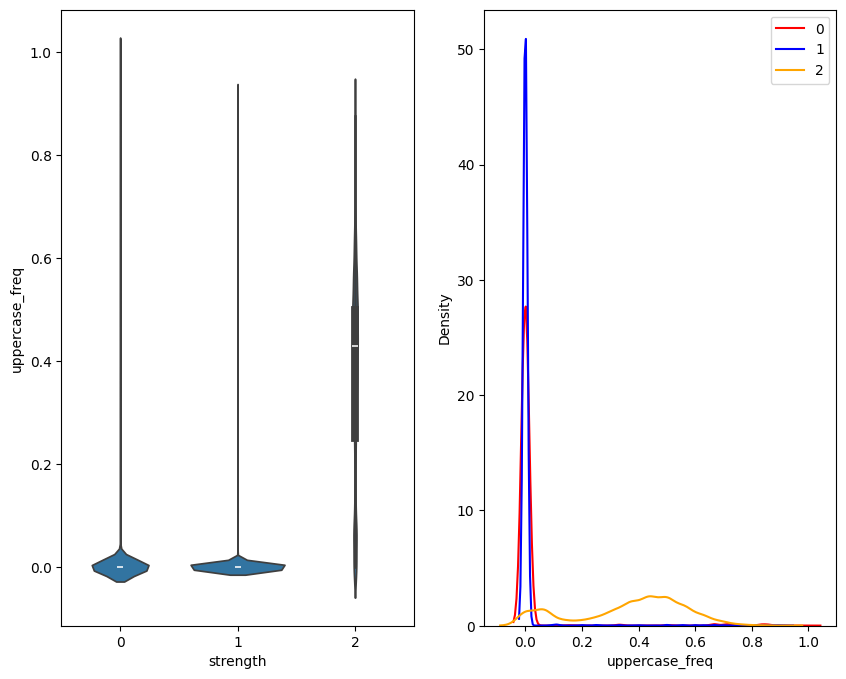

In [ ]:
get_dist(data , 'uppercase_freq')

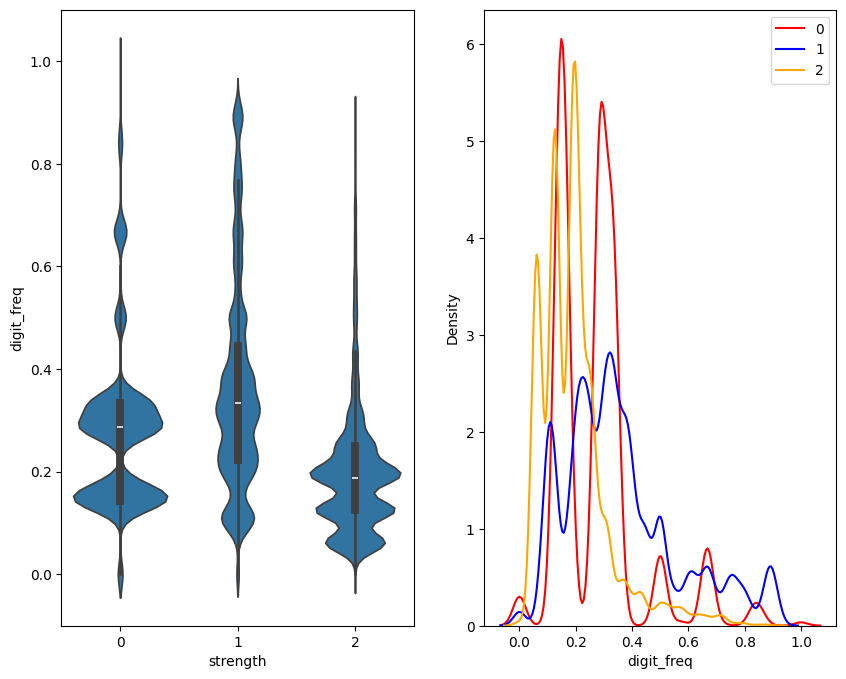

In [ ]:
get_dist(data , 'digit_freq')

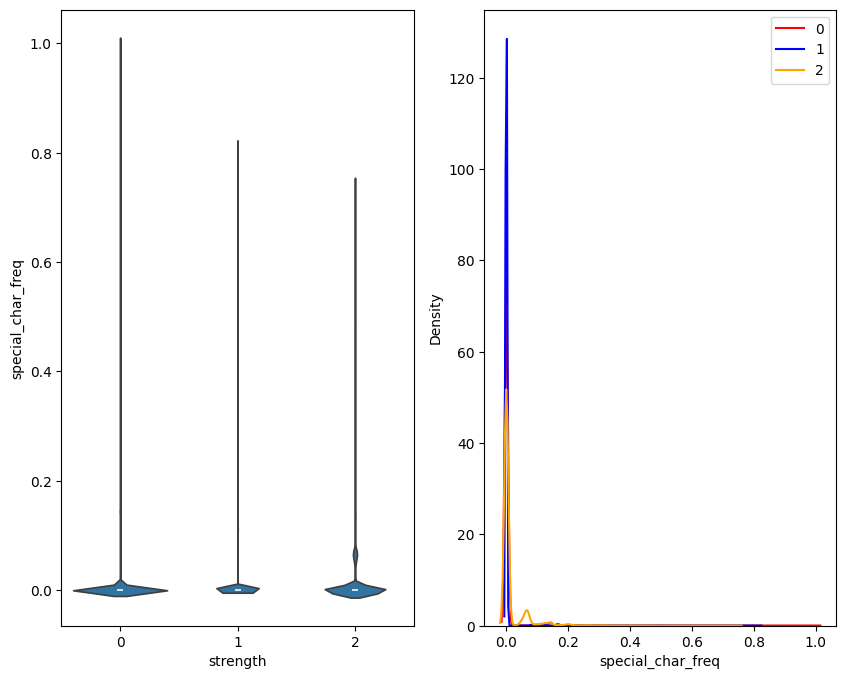

In [ ]:
get_dist(data , 'special_char_freq')

# 7. Apply TF-IDF on data

In [ ]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [ ]:
data.sample(frac=1)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
91372,12esra,0,6,0.667,0.0,0.333,0.0
26990,UndXAajk5NQ0X5MC,2,16,0.312,0.5,0.188,0.0
56432,mtnpkcej568,1,11,0.727,0.0,0.273,0.0
65937,hamima537,1,9,0.667,0.0,0.333,0.0
68846,21480marek,1,10,0.500,0.0,0.500,0.0
...,...,...,...,...,...,...,...
82907,a888888,0,7,0.143,0.0,0.857,0.0
69596,ia7tf267,1,8,0.500,0.0,0.500,0.0
17018,nqac2awu,1,8,0.875,0.0,0.125,0.0
2646,lk46aei,0,7,0.714,0.0,0.286,0.0


In [ ]:
dataframe = data.sample(frac=1)
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
94810,rolnvtd6,1,8,0.875,0.0,0.125,0.0
65790,sniegs12345,1,11,0.545,0.0,0.455,0.0
80922,gsrll977ne30v,1,13,0.615,0.0,0.385,0.0
41198,2pp3g80q,1,8,0.500,0.0,0.500,0.0
9018,wordpre55,1,9,0.778,0.0,0.222,0.0
...,...,...,...,...,...,...,...
32450,04ullahj,1,8,0.750,0.0,0.250,0.0
35706,mqwreyj4,1,8,0.875,0.0,0.125,0.0
27821,coolcatz5,1,9,0.889,0.0,0.111,0.0
52565,lydbmaf2,1,8,0.875,0.0,0.125,0.0


# 8. Apply NLP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="char")

In [ ]:
list(dataframe["password"])

['rolnvtd6',
 'sniegs12345',
 'gsrll977ne30v',
 '2pp3g80q',
 'wordpre55',
 'kkhe51',
 'w5262098',
 'vishvrv143',
 'krstic1',
 'se20011997',
 'smither33ns',
 'radmor1',
 'hamydom1972',
 'eqetiq933',
 'YlujUmIMexyc468',
 'tlhp98',
 'kk2010',
 'sencer54',
 'wed840707',
 'kurapiko1',
 'nomorunik1',
 'sardar0092',
 '7555495ol',
 'bart311428',
 'drink000',
 'j6ux0aar',
 'feraw762',
 '0711986810k',
 'kanz27',
 'shani2d',
 'fisu1976',
 'kofi1987',
 'agpga12',
 'keithmoon1',
 'funky1970',
 '789dmpn9',
 'sierra7',
 'polokolo0',
 'geluxi557',
 'rxy011222',
 'pcgexfa359',
 'p08121994',
 'RA41pOTcwMQxWP9r',
 'atipehi968',
 'Gallaritta060789',
 'coxywusd91',
 'bajingan83',
 'kayaraya31',
 '9ose6oo',
 'merlin4eva',
 'Gargola12101233',
 '07021988r',
 'mrolimpia1',
 'noxbuwe35',
 'jakarta13',
 'ahadile531',
 'popmart97',
 'webhost17',
 'c443balg',
 'tamiyatt01',
 'eihiyypom1',
 'pcs0f96h',
 'kzxgtjlq605',
 'sammy22',
 'loled12',
 'ziA3qtzYxMwmkY6P',
 'riflic9',
 'khristina.mosina3J',
 'ocyleiz16',
 'jo

In [ ]:
x = list(dataframe["password"])
x

['rolnvtd6',
 'sniegs12345',
 'gsrll977ne30v',
 '2pp3g80q',
 'wordpre55',
 'kkhe51',
 'w5262098',
 'vishvrv143',
 'krstic1',
 'se20011997',
 'smither33ns',
 'radmor1',
 'hamydom1972',
 'eqetiq933',
 'YlujUmIMexyc468',
 'tlhp98',
 'kk2010',
 'sencer54',
 'wed840707',
 'kurapiko1',
 'nomorunik1',
 'sardar0092',
 '7555495ol',
 'bart311428',
 'drink000',
 'j6ux0aar',
 'feraw762',
 '0711986810k',
 'kanz27',
 'shani2d',
 'fisu1976',
 'kofi1987',
 'agpga12',
 'keithmoon1',
 'funky1970',
 '789dmpn9',
 'sierra7',
 'polokolo0',
 'geluxi557',
 'rxy011222',
 'pcgexfa359',
 'p08121994',
 'RA41pOTcwMQxWP9r',
 'atipehi968',
 'Gallaritta060789',
 'coxywusd91',
 'bajingan83',
 'kayaraya31',
 '9ose6oo',
 'merlin4eva',
 'Gargola12101233',
 '07021988r',
 'mrolimpia1',
 'noxbuwe35',
 'jakarta13',
 'ahadile531',
 'popmart97',
 'webhost17',
 'c443balg',
 'tamiyatt01',
 'eihiyypom1',
 'pcs0f96h',
 'kzxgtjlq605',
 'sammy22',
 'loled12',
 'ziA3qtzYxMwmkY6P',
 'riflic9',
 'khristina.mosina3J',
 'ocyleiz16',
 'jo

In [ ]:
X = vectorizer.fit_transform(x)

In [ ]:
X.shape

(100000, 99)

In [ ]:
dataframe["password"].shape

(100000,)

In [ ]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.38171158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36480709, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.34926214, 0.        ,
       0.31136038, 0.29761054, 0.        , 0.        , 0.32263004,
       0.        , 0.34346201, 0.        , 0.4377835 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
dataframe["password"]

,password
94810,rolnvtd6
65790,sniegs12345
80922,gsrll977ne30v
41198,2pp3g80q
9018,wordpre55
...,...
32450,04ullahj
35706,mqwreyj4
27821,coolcatz5
52565,lydbmaf2


In [ ]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [ ]:
len(vectorizer.get_feature_names_out())

99

In [ ]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.iloc[:, 20:50]

,0,1,2,3,4,5,6,7,8,9,...,_,`,a,b,c,d,e,f,g,h
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.381712,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.364807,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.215376,0.249180,0.279082,0.308146,0.311976,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.242977,0.000000,0.329246,0.000000
2,0.224479,0.000000,0.000000,0.223157,0.000000,0.000000,0.000000,0.520381,0.000000,0.240784,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.194287,0.000000,0.263268,0.000000
3,0.273969,0.000000,0.243173,0.272355,0.000000,0.000000,0.000000,0.000000,0.307695,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.321310,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.578623,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.289713,0.225325,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.295034,0.000000,0.000000,0.000000,0.323839,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.217978,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.351815
99996,0.000000,0.000000,0.000000,0.000000,0.338563,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.266961,0.000000,0.000000,0.000000
99997,0.000000,0.000000,0.000000,0.000000,0.000000,0.292888,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.194724,0.000000,0.61,0.000000,0.000000,0.000000,0.000000,0.000000
99998,0.000000,0.000000,0.289339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.240843,0.403745,0.00,0.362760,0.000000,0.440189,0.000000,0.000000


# 9. Logistic Regression

In [ ]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [ ]:
df2.head()

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625


In [ ]:
y = dataframe["strength"]
y

,strength
94810,1
65790,1
80922,1
41198,1
9018,1
...,...
32450,1
35706,1
27821,1
52565,1


In [ ]:
# split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [ ]:
X_train.shape

(80000, 101)

In [ ]:
y_train.shape

(80000,)

In [ ]:
# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(multi_class="multinomial")

In [ ]:
clf.fit(X_train , y_train) #train my model

LogisticRegression(multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict and evaluate
predictions_clf = clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions_clf))
print("Classification Report:\n", classification_report(y_test, predictions_clf))

Logistic Regression Accuracy: 0.8027
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.26      0.34      2716
           1       0.83      0.93      0.88     14842
           2       0.79      0.61      0.69      2442

    accuracy                           0.80     20000
   macro avg       0.71      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000



- Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
predictions_dt = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, predictions_dt))
print("Classification Report:\n", classification_report(y_test, predictions_dt))

Decision Tree Accuracy: 0.88675
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2716
           1       0.93      0.93      0.93     14842
           2       0.81      0.79      0.80      2442

    accuracy                           0.89     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.89      0.89      0.89     20000



- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
predictions_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, predictions_rf))
print("Classification Report:\n", classification_report(y_test, predictions_rf))

Random Forest Accuracy: 0.9289
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      2716
           1       0.93      0.98      0.95     14842
           2       0.95      0.88      0.91      2442

    accuracy                           0.93     20000
   macro avg       0.93      0.85      0.88     20000
weighted avg       0.93      0.93      0.93     20000



In [ ]:
y_pred = predictions_rf

In [ ]:
y_pred

array([1, 2, 1, ..., 1, 1, 1])

- SVM

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel for non-linear decision boundaries
svm_model.fit(X_train, y_train)

# Predict and evaluate
predictions_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, predictions_svm))
print("Classification Report:\n", classification_report(y_test, predictions_svm))

SVM Accuracy: 0.7834
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2716
           1       0.78      0.99      0.87     14842
           2       0.86      0.40      0.55      2442

    accuracy                           0.78     20000
   macro avg       0.55      0.46      0.47     20000
weighted avg       0.68      0.78      0.71     20000



- Neural Networking

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple feed-forward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7159 - loss: -4.0756 - val_accuracy: 0.7293 - val_loss: -102.2450
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7297 - loss: -217.8175 - val_accuracy: 0.7371 - val_loss: -794.9744
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7316 - loss: -1068.8268 - val_accuracy: 0.7352 - val_loss: -2349.5710
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7300 - loss: -2693.0981 - val_accuracy: 0.7351 - val_loss: -4942.5439
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7280 - loss: -5642.8857 - val_accuracy: 0.7259 - val_loss: -8705.5146
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7326 - loss: -9853.2539 - val_accuracy: 0.7342 - val_loss: -14006.0957
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7332 - loss: -14688.2734 - val_accuracy: 0.7361 - val_loss: -20877.2168
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━

In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

# Save each model to a separate file
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('dtree.pkl', 'wb') as f:
    pickle.dump(dtree, f)

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save datasets
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

with open('y_pred.pkl', 'wb') as f:
    pickle.dump(y_pred, f)


# 10.Make prediction with user-entered input

In [ ]:
password = "%@123abcd"

In [ ]:
sample_array = np.array([password])

In [ ]:
sample_array

array(['%@123abcd'], dtype='<U9')

In [ ]:
sample_matrix = vectorizer.transform(sample_array)

In [ ]:
sample_matrix

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
type(sample_matrix)

scipy.sparse._csr.csr_matrix

In [ ]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
sample_matrix.toarray().shape

(1, 99)

In [ ]:
len(password)

9

In [ ]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [ ]:
np.append(sample_matrix.toarray() , (9, 0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [ ]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [ ]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [ ]:
rf.predict(new_matrix)

array([2])

In [ ]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])

    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)

    result = rf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [ ]:
predict()

Enter a password : kaka


'Password is weak'

# 11. Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [ ]:
accuracy_score(y_test , y_pred)

0.9289

In [ ]:
confusion_matrix(y_test , y_pred)

array([[ 1858,   857,     1],
       [  154, 14581,   107],
       [    9,   294,  2139]])

In [ ]:
# Create report of your model
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2716
           1       0.93      0.98      0.95     14842
           2       0.95      0.88      0.91      2442

    accuracy                           0.93     20000
   macro avg       0.93      0.85      0.88     20000
weighted avg       0.93      0.93      0.93     20000



# 12. SHAP

In [ ]:
explainer = shap.Explainer(dtree, X_train)
shap_values = explainer.shap_values(X_test)

 98%|===================| 58687/60000 [00:31<00:00]       

In [ ]:
feature_names = list(X_test)

In [ ]:
print("Shape of shap_values:", shap_values[:, :, :].shape)
print("Shape of X_test:", X_test.shape)
print("Length of feature_names:", len(feature_names))

Shape of shap_values: (20000, 101, 3)
Shape of X_test: (20000, 101)
Length of feature_names: 101


In [ ]:
# Save SHAP explainer
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

# Save SHAP values
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)


In [ ]:
shap_values[:, :, :]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.94771900e-04, -1.05228106e-04,  5.00000007e-04],
        [ 1.59340654e-04,  7.32605084e-06, -1.66666694e-04]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.59890116e-03,  1.65842488e-03, -5.95238106e-05],
        [ 7.80969037e-04, -8.00810302e-04,  1.98412710e-05]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

In [ ]:
feature_names

['\x04',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x17',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¨',
 '°',
 '±',
 '³',
 '´',
 'µ',
 '·',
 'ß',
 'à',
 'á',
 'ä',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'ñ',
 'ó',
 'õ',
 'ö',
 '÷',
 'ú',
 'ü',
 'ý',
 'þ',
 '›',
 'length',
 'lowercase_freq']

In [ ]:
#shap.summary_plot(shap_values[:, :, 2], X_test,feature_names = feature_names, max_display = 10)

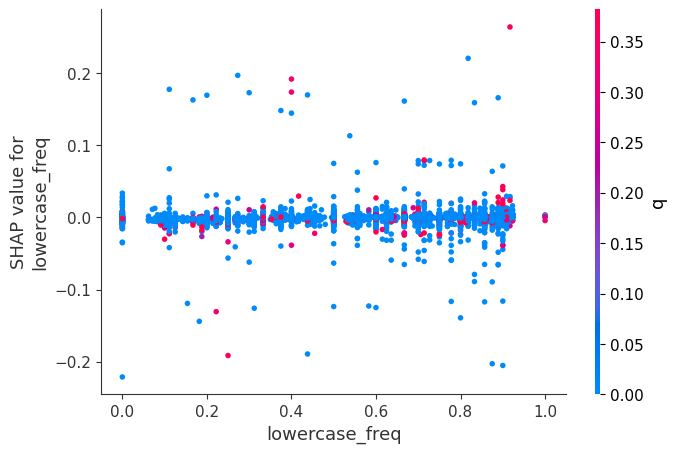

In [ ]:
shap.dependence_plot('lowercase_freq', shap_values[:,:,2], X_test)

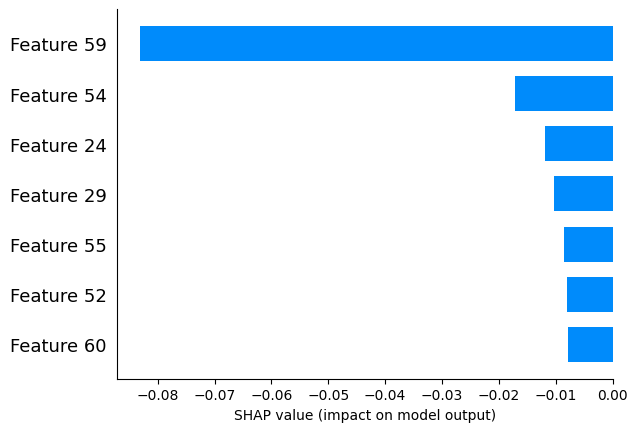

In [ ]:
shap.bar_plot(shap_values[2,:,0])